### In this file, I aim to improve my data science and visualization skills by analyzing data obtained from various sources. All work is done for personal learning purposes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Lets prepare our data

In [2]:
df_iq = pd.read_csv("turkiye_mean_iq_data.csv")

In [3]:
df_iq= df_iq.drop(["Unnamed: 0","Katılımcı Sayısı","IQ Ortalama"],axis=1)

In [4]:
df_iq.rename(columns={"#":"Province Name","İl":"Average IQ"},inplace=True)

In [5]:
df_avg_education_time = pd.read_excel("illere gore ortalama egitim suresi.xltx")
df_avg_education_time.rename(columns={"Province name": "Province Name"}, inplace=True)
df_avg_education_time["Province Name"] = df_avg_education_time["Province Name"].str.strip()
df_avg_education_time

,Province code,Province Name,Total,Males,Females,Gender parity index
0,NaN,Türkiye,9.329045,10.069893,8.604977,0.854525
1,1.0,Adana,9.173226,9.908357,8.462262,0.854053
2,2.0,Adıyaman,8.592518,9.649623,7.526147,0.779942
3,3.0,Afyonkarahisar,8.515203,9.463769,7.592707,0.802292
4,4.0,Ağrı,7.425066,8.758488,5.958352,0.680295
...,...,...,...,...,...,...
77,77.0,Yalova,9.790617,10.428364,9.173359,0.879655
78,78.0,Karabük,9.033651,10.001971,8.092721,0.809113
79,79.0,Kilis,9.275002,9.954195,8.585972,0.862548
80,80.0,Osmaniye,9.106063,9.972291,8.255086,0.827802


In [6]:
avg_iq_and_avg_education_merge = pd.merge(df_iq,df_avg_education_time,on="Province Name",how="outer")

In [7]:
avg_iq_and_avg_education_merge.sort_values("Average IQ",inplace=True)


In [8]:
avg_iq_mean = avg_iq_and_avg_education_merge["Average IQ"].mean()
avg_iq_and_avg_education_merge["Average IQ"].fillna(avg_iq_mean, inplace=True)

In [9]:
avg_iq_and_avg_education_merge

,Province Name,Average IQ,Province code,Total,Males,Females,Gender parity index
80,Bingöl,94.190000,12.0,8.939653,9.965271,7.908337,0.793590
79,Siirt,94.520000,56.0,8.514311,10.188770,6.672399,0.654878
78,Hakkari,95.160000,30.0,9.561426,10.560436,8.404215,0.795821
77,Artvin,95.360000,8.0,9.215184,10.219575,8.198701,0.802255
76,Kars,95.840000,36.0,8.341115,9.364240,7.237439,0.772881
...,...,...,...,...,...,...,...
3,Muğla,104.120000,48.0,9.725247,10.099340,9.342238,0.925034
2,İzmir,104.510000,35.0,9.820948,10.292757,9.371000,0.910446
1,Ankara,104.910000,6.0,10.692814,11.327607,10.095191,0.891202
0,Eskişehir,105.200000,26.0,9.995942,10.723148,9.300807,0.867358


In [10]:
avg_iq_and_avg_education_merge[["Average IQ","Gender parity index "]].corr()


,Average IQ,Gender parity index
Average IQ,1.00000,0.66224
Gender parity index,0.66224,1.00000


##### Correlation Results:
This (0.664188) is a positive correlation. It shows that the average IQ level and Gender Parity Index have a moderately strong relationship.

##### Korelasyon Sonuçları: 
Bu (0.664188) pozitif bir korelasyondur. Ortalama iq seviyesi ve toplumsal cinsiyet eşitliği endeksinin orta düzeyde güçlü bir ilişki içersisinde olduğunu gösterir.

### Let's show this data in the graph

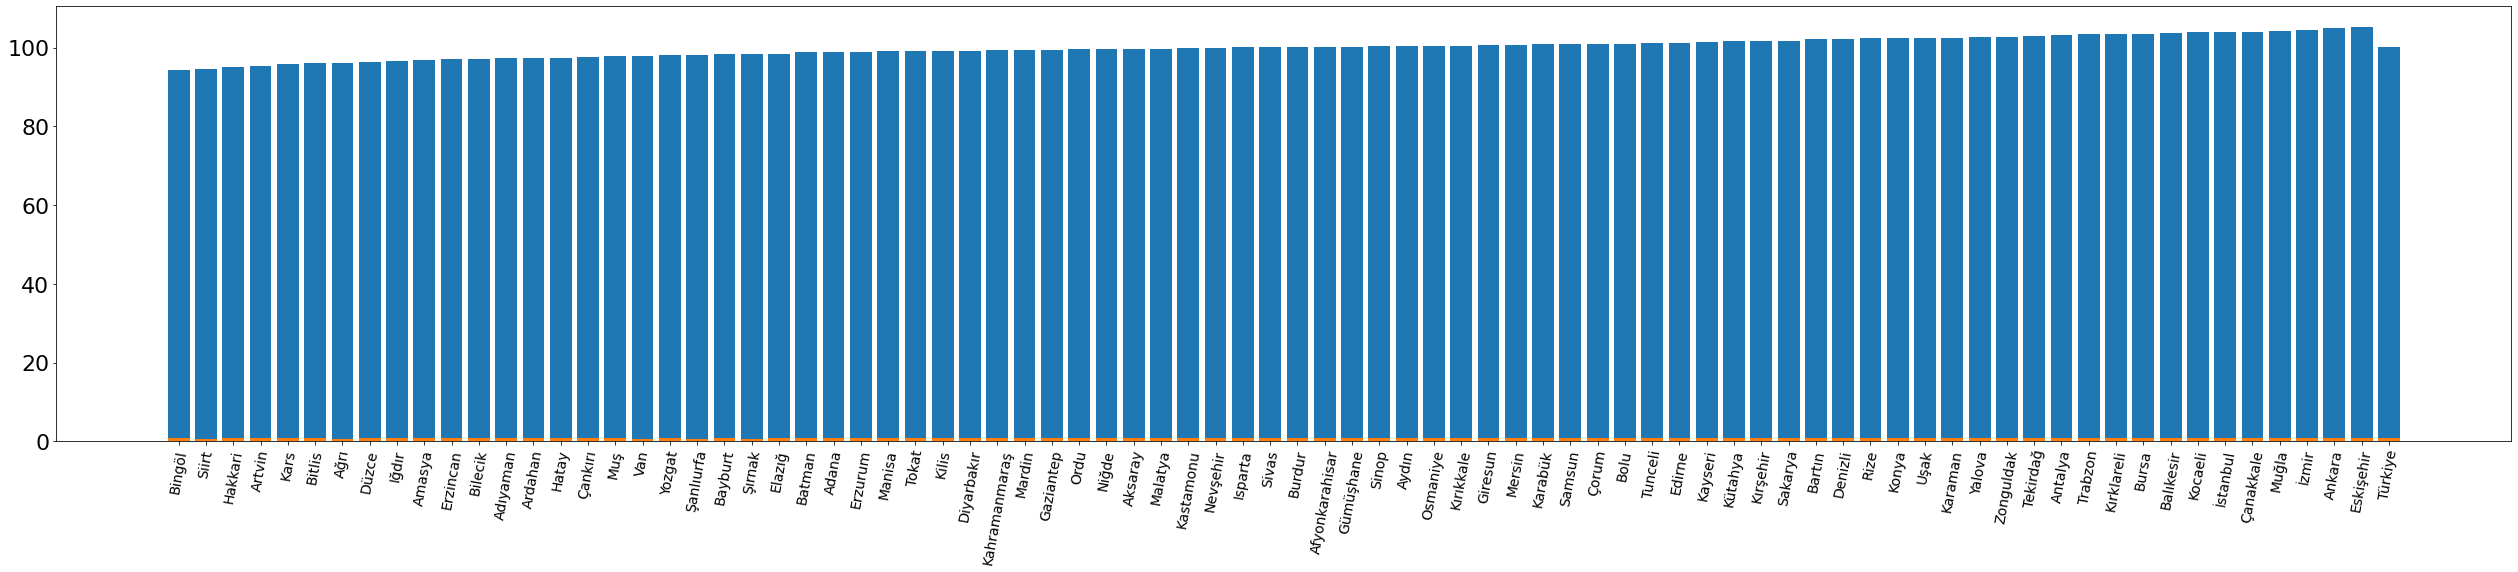

In [11]:
plt.figure(figsize=(44,8))
plt.xticks(fontsize=14, rotation=80)
plt.yticks(fontsize=22)
plt.bar(avg_iq_and_avg_education_merge["Province Name"],avg_iq_and_avg_education_merge["Average IQ"])
plt.bar(avg_iq_and_avg_education_merge["Province Name"],avg_iq_and_avg_education_merge["Gender parity index "])
plt.show()

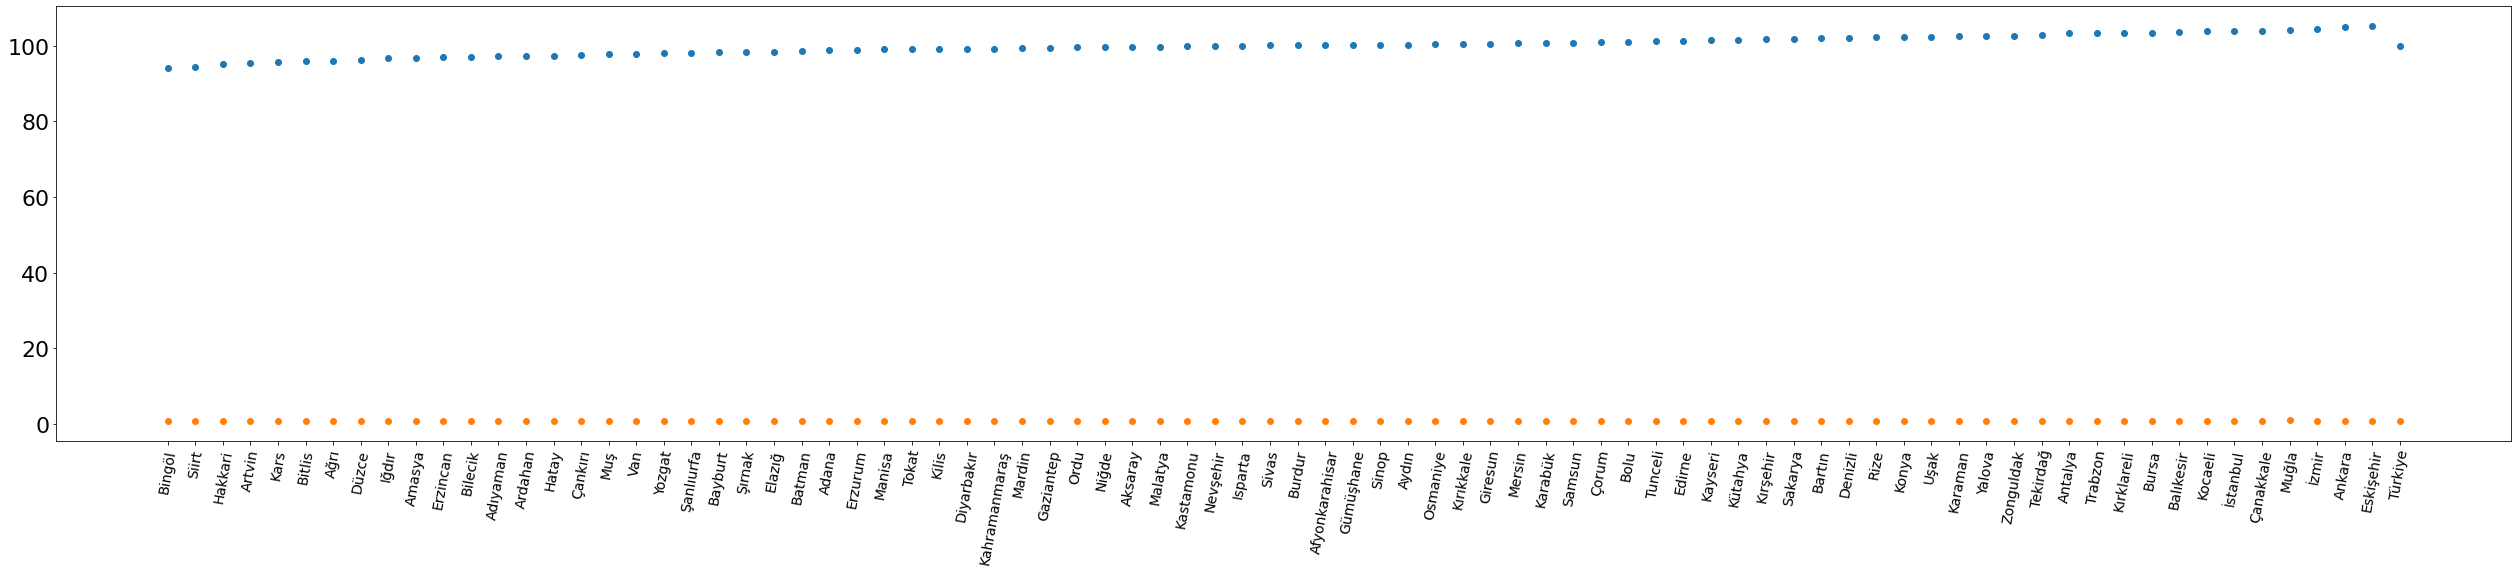

In [12]:
plt.figure(figsize=(44,8))
plt.xticks(fontsize=14, rotation=80)
plt.yticks(fontsize=22)
plt.scatter(avg_iq_and_avg_education_merge["Province Name"],avg_iq_and_avg_education_merge["Average IQ"])
plt.scatter(avg_iq_and_avg_education_merge["Province Name"],avg_iq_and_avg_education_merge["Gender parity index "])
plt.show()

The two graphs above are quite difficult to interpret.

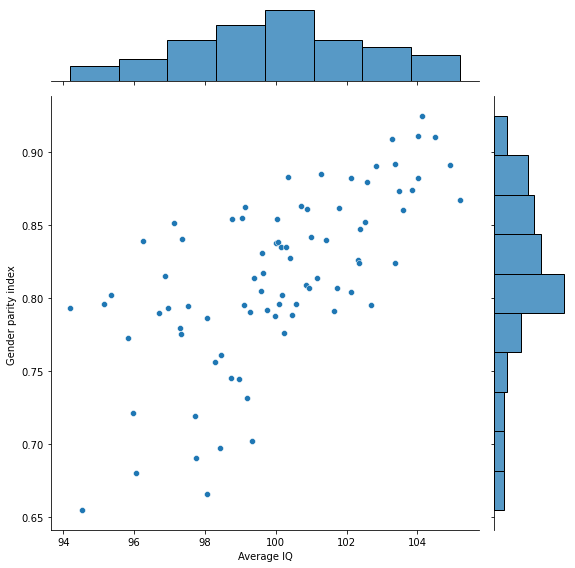

In [13]:
import seaborn as sns

sns.jointplot(
    data=avg_iq_and_avg_education_merge,
    x="Average IQ",
    y="Gender parity index ",
    kind="scatter",
    height=8
)
plt.show()


In this graph we can clearly see the relationship between gpi and avarege iq

## Lets add new dataFrame education levels of Turkiye by provinces !

In [14]:
education_levels_of_turkiye_by_provinces = pd.read_csv("clean_data.csv",sep=";")

education_levels_of_turkiye_by_provinces["Year"].fillna(2023,inplace=True)
elotbp = education_levels_of_turkiye_by_provinces


In [15]:
for col in elotbp.columns:
    if col != "Province Name":
        elotbp[col] = elotbp[col].astype(str).str.replace(' ', '', regex=False)
        elotbp[col] = pd.to_numeric(elotbp[col], errors='coerce')

In [16]:
for col in elotbp.columns[6::3]:
    value = elotbp[col]/elotbp.Total
    loc = elotbp.columns.get_loc(col)

    name = col.split()[1:]
    name.insert(0,"Rate of")
    name = " ".join(name)

    elotbp.insert((loc),name,value)


In [17]:
df1 = df_iq[["Province Name","Average IQ"]]
elotbp_with_iq = pd.merge(elotbp,df1,on="Province Name",how="outer")
elotbp_with_iq

,Year,Province Code,Province Name,Total,Male,Female,Rate of Illiterate,Total Illiterate,Male Illiterate,Female Illiterate,...,Female Universities and Higher Institutions,Rate of Master,Total Master,Male Master,Female Master,Rate of Doctorate,Total Doctorate,Male Doctorate,Female Doctorate,Average IQ
0,2023.0,1,Adana,2072814,1033965,1038849,0.028095,58236,10026,48210,...,150238,0.017390,36046,19173,16873,0.002366,4905,2774,2131,98.76
1,2023.0,2,Adıyaman,543029,275246,267783,0.047817,25966,3941,22025,...,29572,0.012603,6844,4495,2349,0.001342,729,498,231,97.29
2,2023.0,3,Afyonkarahisar,686196,341116,345080,0.019350,13278,2022,11256,...,37915,0.014806,10160,5790,4370,0.002362,1621,1046,575,100.17
3,2023.0,4,Ağrı,449814,234031,215783,0.057375,25808,3648,22160,...,17524,0.009506,4276,2662,1614,0.001012,455,317,138,96.06
4,2023.0,5,Amasya,316138,156312,159826,0.022323,7057,1286,5771,...,21413,0.014968,4732,2701,2031,0.002363,747,451,296,96.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2023.0,77,Yalova,260684,129972,130712,0.015014,3914,724,3190,...,22737,0.020834,5431,2957,2474,0.003157,823,541,282,102.58
77,2023.0,78,Karabük,230120,113957,116163,0.032800,7548,1059,6489,...,18101,0.018430,4241,2268,1973,0.004024,926,641,285,100.85
78,2023.0,79,Kilis,137831,69286,68545,0.023079,3181,653,2528,...,8443,0.015403,2123,1276,847,0.002314,319,203,116,99.14
79,2023.0,80,Osmaniye,509660,255852,253808,0.037254,18987,3382,15605,...,34062,0.014508,7394,4290,3104,0.001240,632,390,242,100.39


## Let's analyse this cleaned and merged dataset !

In [18]:
elotbp_with_iq[["Rate of Illiterate","Average IQ"]].corr()

,Rate of Illiterate,Average IQ
Rate of Illiterate,1.00000,-0.61661
Average IQ,-0.61661,1.00000


##### Correlation Results:
This (-0.61661) is a negative correlation.
It shows that the average IQ level and literacy rate have a moderate inverse relationship.

##### Korelasyon Sonuçları: 
Bu (-0.61661) negatif bir korelasyondur. 
ortalama iq seviyesi ve  okuma yazma bilme oranının orta düzeyde ters bir ilişkide olduğunu gösterir.



In [19]:
elotbp_with_iq[["Rate of Doctorate","Average IQ"]].corr()

,Rate of Doctorate,Average IQ
Rate of Doctorate,1.000000,0.467656
Average IQ,0.467656,1.000000


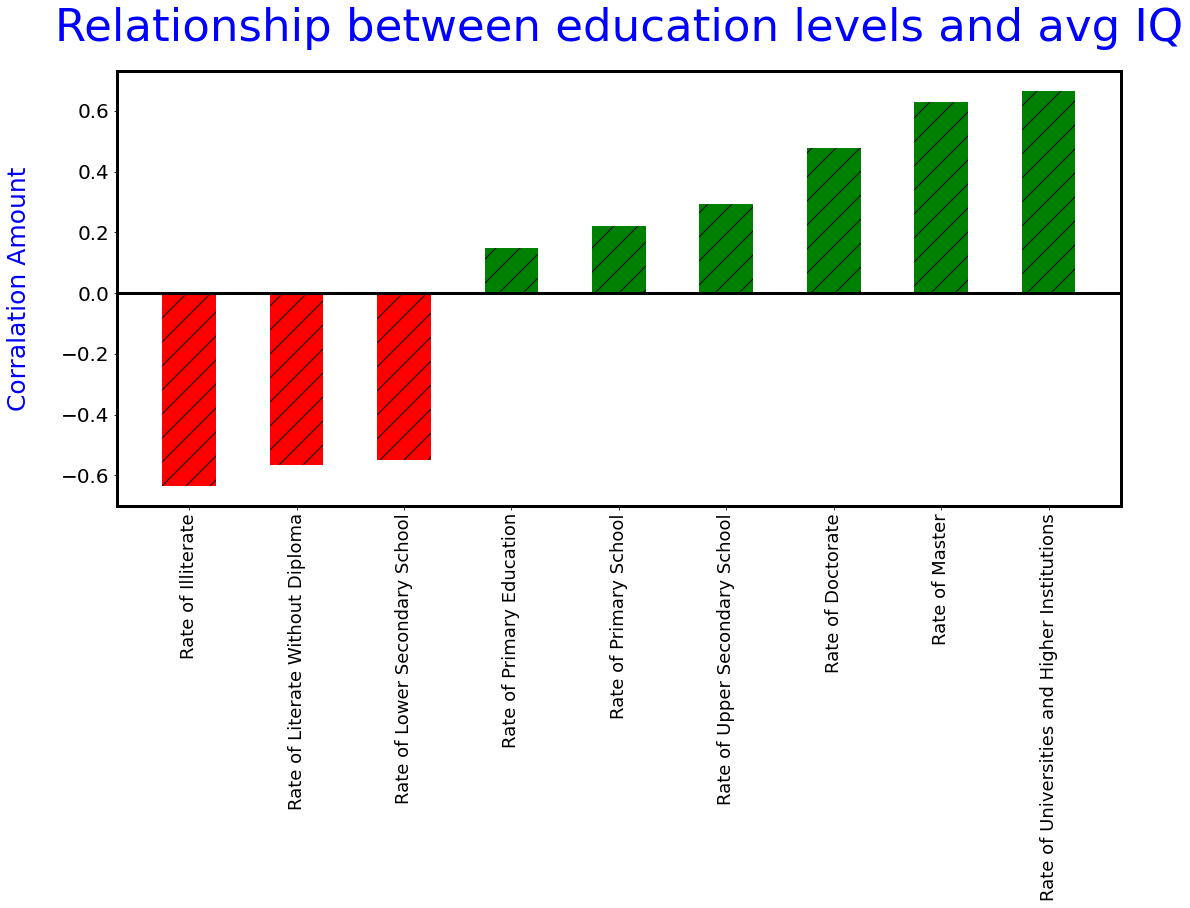

In [20]:
#elotbp_with_iq.iloc[:-1,6:-1:4]
df = elotbp_with_iq.iloc[:-1,6::4].corr()["Average IQ"][:-1]
df.sort_values(inplace=True)

colors = ["green" if val > 0 else "red" for val in df.values]

plt.figure(figsize=(18,8))
plt.bar(df.index, df.values,width=0.5,hatch="/",color=colors)
plt.axhline(y=0, color='black', linewidth=3)  # Çizgi özellikleri
plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=20)

plt.ylabel("Corralation Amount",fontsize=25,labelpad=30.0,color="blue")
plt.title("Relationship between education levels and avg IQ",fontsize=45,pad=30.0,color="blue")

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)
    
plt.show()

## Now we can compare this values with divorce rates

In [45]:
divorce_rates = pd.read_csv("divorce.csv",sep=";")

divorce_rates.rename(columns={"Province":"Province Name","Rate":"Divorce Rate"},inplace=True)
divorce_rates.loc[0, "Province Name"] = "Türkiye"
divorce_rates["Divorce Rate"] = divorce_rates["Divorce Rate"].str.replace(",", ".")
divorce_rates["Divorce Rate"] = pd.to_numeric(divorce_rates["Divorce Rate"])

In [42]:
iq_education_divorce = pd.merge(divorce_rates,elotbp_with_iq,on="Province Name",how="outer")
iq_education_divorce.dropna(inplace=True)

In [44]:
# İlgili sütunlar arasındaki korelasyon
correlation = iq_education_divorce[["Divorce Rate", "Average IQ"]].corr()
correlation

,Divorce Rate,Average IQ
Divorce Rate,1.000000,0.690193
Average IQ,0.690193,1.000000


Her adayın oylarının en yüksek olduğu 5 ilçenin ıq ortalamaları